In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#vectorizer
from sklearn.feature_extraction.text import CountVectorizer
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec
from gensim import corpora
#for worcloud
from wordcloud import WordCloud

In [198]:
data=pd.read_excel(r"C:\Users\lecka\Downloads\Clinic of IA\CODERPASS_Project_WPDFOZ9D8ALU.xlsx")
data.head()

,id,patient_id,first_name,last_name,email,gender,age,country,postal_code,diagnosis,...,icd_code,icd_desc_short,icd_desc_long,icd_proc_code,icd_proc_desc_short,icd_proc_desc_long,icd9_code,icd9_desc_short,icd9_desc_long,icd9_proc_code
0,1,1,Horatio,Lorens,hlorens0@cnet.com,Male,26,France,93909 CEDEX 9,depression,...,S85011,"Laceration of popliteal artery, right leg","Laceration of popliteal artery, right leg",06U34JZ,"Supplement Esophageal Vein w Synth Sub, Perc Endo",Supplement Esophageal Vein with Synthetic Subs...,75024,Cong salivary fistula,Congenital fistula of salivary gland,972.0
1,2,2,Cosimo,Harring,charring1@ning.com,Male,24,France,75270 CEDEX 06,bipolar disorder,...,S6401XS,Injury of ulnar nerve at wrs/hnd lv of right a...,Injury of ulnar nerve at wrist and hand level ...,0DTG0ZZ,"Resection of Left Large Intestine, Open Approach","Resection of Left Large Intestine, Open Approach",E9918,War inj:weapon fragments,Injury due to war operations by fragments from...,7724.0
2,3,3,Luigi,MacKartan,lmackartan2@slashdot.org,Male,25,France,49033 CEDEX 01,PTSD,...,F1195,"Opioid use, unsp with opioid-induced psychotic...","Opioid use, unspecified with opioid-induced ps...",0D5Q8ZZ,"Destruction of Anus, Endo","Destruction of Anus, Via Natural or Artificial...",29514,Hebephrenia-chr/exacerb,"Disorganized type schizophrenia, chronic with ...",8670.0
3,4,4,Rikki,Spaice,rspaice3@ocn.ne.jp,Male,21,Kenya,NaN,schizophrenia,...,T463X6S,"Underdosing of coronary vasodilators, sequela","Underdosing of coronary vasodilators, sequela",0RGR47Z,"Fusion of L Carpal Jt with Autol Sub, Perc End...",Fusion of Left Carpal Joint with Autologous Ti...,262,Oth severe malnutrition,Other severe protein-calorie malnutrition,2231.0
4,5,5,Roscoe,Chelnam,rchelnam4@miitbeian.gov.cn,Polygender,18,France,92179 CEDEX,bipolar disorder,...,T23129D,Burn first degree of unsp single finger except...,Burn of first degree of unspecified single fin...,0SPD45Z,"Removal of Ext Fix from L Knee Jt, Perc Endo A...",Removal of External Fixation Device from Left ...,8064,Cl lumbar fx w cord inj,Closed fracture of lumbar spine with spinal co...,3482.0


Data Exploration

In [199]:
print("Le nombre de lignes:",data.shape[0],"et le nombre de colonnes",data.shape[1])

Le nombre de lignes: 1000 et le nombre de colonnes 22


In [200]:
print("Les colonnes de notre datset sont:",
      "\n",data.columns)

Les colonnes de notre datset sont: 
 Index(['id', 'patient_id', 'first_name', 'last_name', 'email', 'gender', 'age',
       'country', 'postal_code', 'diagnosis', 'treatment', 'appointment_date',
       'icd_code', 'icd_desc_short', 'icd_desc_long', 'icd_proc_code',
       'icd_proc_desc_short', 'icd_proc_desc_long', 'icd9_code',
       'icd9_desc_short', 'icd9_desc_long', 'icd9_proc_code'],
      dtype='object')


In [201]:
data=data.drop(columns=['id'])
data.head()

,patient_id,first_name,last_name,email,gender,age,country,postal_code,diagnosis,treatment,...,icd_code,icd_desc_short,icd_desc_long,icd_proc_code,icd_proc_desc_short,icd_proc_desc_long,icd9_code,icd9_desc_short,icd9_desc_long,icd9_proc_code
0,1,Horatio,Lorens,hlorens0@cnet.com,Male,26,France,93909 CEDEX 9,depression,therapy,...,S85011,"Laceration of popliteal artery, right leg","Laceration of popliteal artery, right leg",06U34JZ,"Supplement Esophageal Vein w Synth Sub, Perc Endo",Supplement Esophageal Vein with Synthetic Subs...,75024,Cong salivary fistula,Congenital fistula of salivary gland,972.0
1,2,Cosimo,Harring,charring1@ning.com,Male,24,France,75270 CEDEX 06,bipolar disorder,therapy,...,S6401XS,Injury of ulnar nerve at wrs/hnd lv of right a...,Injury of ulnar nerve at wrist and hand level ...,0DTG0ZZ,"Resection of Left Large Intestine, Open Approach","Resection of Left Large Intestine, Open Approach",E9918,War inj:weapon fragments,Injury due to war operations by fragments from...,7724.0
2,3,Luigi,MacKartan,lmackartan2@slashdot.org,Male,25,France,49033 CEDEX 01,PTSD,therapy,...,F1195,"Opioid use, unsp with opioid-induced psychotic...","Opioid use, unspecified with opioid-induced ps...",0D5Q8ZZ,"Destruction of Anus, Endo","Destruction of Anus, Via Natural or Artificial...",29514,Hebephrenia-chr/exacerb,"Disorganized type schizophrenia, chronic with ...",8670.0
3,4,Rikki,Spaice,rspaice3@ocn.ne.jp,Male,21,Kenya,NaN,schizophrenia,medication,...,T463X6S,"Underdosing of coronary vasodilators, sequela","Underdosing of coronary vasodilators, sequela",0RGR47Z,"Fusion of L Carpal Jt with Autol Sub, Perc End...",Fusion of Left Carpal Joint with Autologous Ti...,262,Oth severe malnutrition,Other severe protein-calorie malnutrition,2231.0
4,5,Roscoe,Chelnam,rchelnam4@miitbeian.gov.cn,Polygender,18,France,92179 CEDEX,bipolar disorder,therapy,...,T23129D,Burn first degree of unsp single finger except...,Burn of first degree of unspecified single fin...,0SPD45Z,"Removal of Ext Fix from L Knee Jt, Perc Endo A...",Removal of External Fixation Device from Left ...,8064,Cl lumbar fx w cord inj,Closed fracture of lumbar spine with spinal co...,3482.0


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   patient_id           1000 non-null   int64         
 1   first_name           1000 non-null   object        
 2   last_name            1000 non-null   object        
 3   email                1000 non-null   object        
 4   gender               1000 non-null   object        
 5   age                  1000 non-null   int64         
 6   country              1000 non-null   object        
 7   postal_code          949 non-null    object        
 8   diagnosis            1000 non-null   object        
 9   treatment            1000 non-null   object        
 10  appointment_date     1000 non-null   datetime64[ns]
 11  icd_code             1000 non-null   object        
 12  icd_desc_short       1000 non-null   object        
 13  icd_desc_long        1000 non-null

In [203]:
data.describe()

,patient_id,age,icd9_proc_code
count,1000.000000,1000.000000,999.000000
mean,500.500000,24.062000,5464.382382
std,288.819436,3.698626,3173.218526
min,1.000000,18.000000,3.000000
25%,250.750000,21.000000,2826.000000
50%,500.500000,24.000000,5695.000000
75%,750.250000,27.000000,8314.000000
max,1000.000000,30.000000,9996.000000


In [204]:
data.describe(include='object')

,first_name,last_name,email,gender,country,postal_code,diagnosis,treatment,icd_code,icd_desc_short,icd_desc_long,icd_proc_code,icd_proc_desc_short,icd_proc_desc_long,icd9_code,icd9_desc_short,icd9_desc_long
count,1000,1000,1000,1000,1000,949,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,940,984,1000,8,4,664,5,3,996,996,996,994,994,994,968,966,968
top,Roxanna,Bolle,hlorens0@cnet.com,Female,France,2309,bipolar disorder,counseling,G40B09,"Juvenile myoclonic epilepsy, not intractable, ...","Juvenile myoclonic epilepsy, not intractable, ...",0NBL4ZX,"Excision of Left Palatine Bone, Perc Endo Appr...","Excision of Left Palatine Bone, Percutaneous E...",71602,Kaschin-beck dis-up/arm,"Kaschin-Beck disease, upper arm"
freq,2,2,1,461,849,5,222,353,2,2,2,2,2,2,2,2,2


In [205]:
print("Le nombre de données dupliquées:",data.duplicated().sum())

Le nombre de données dupliquées: 0


In [206]:
print("Le nombre de données manquantes:\n",data.isna().sum())

Le nombre de données manquantes:
 patient_id              0
first_name              0
last_name               0
email                   0
gender                  0
age                     0
country                 0
postal_code            51
diagnosis               0
treatment               0
appointment_date        0
icd_code                0
icd_desc_short          0
icd_desc_long           0
icd_proc_code           0
icd_proc_desc_short     0
icd_proc_desc_long      0
icd9_code               0
icd9_desc_short         0
icd9_desc_long          0
icd9_proc_code          1
dtype: int64


In [207]:
print("Le pourcentage de données manquantes:\n",
      (data.isna().sum()/data.shape[0])*100)

Le pourcentage de données manquantes:
 patient_id             0.0
first_name             0.0
last_name              0.0
email                  0.0
gender                 0.0
age                    0.0
country                0.0
postal_code            5.1
diagnosis              0.0
treatment              0.0
appointment_date       0.0
icd_code               0.0
icd_desc_short         0.0
icd_desc_long          0.0
icd_proc_code          0.0
icd_proc_desc_short    0.0
icd_proc_desc_long     0.0
icd9_code              0.0
icd9_desc_short        0.0
icd9_desc_long         0.0
icd9_proc_code         0.1
dtype: float64


In [208]:
data.fillna(0000,inplace=True)
data.isna().sum()

patient_id             0
first_name             0
last_name              0
email                  0
gender                 0
age                    0
country                0
postal_code            0
diagnosis              0
treatment              0
appointment_date       0
icd_code               0
icd_desc_short         0
icd_desc_long          0
icd_proc_code          0
icd_proc_desc_short    0
icd_proc_desc_long     0
icd9_code              0
icd9_desc_short        0
icd9_desc_long         0
icd9_proc_code         0
dtype: int64

Données textuelles

In [209]:
data=data.drop(columns=[
    'patient_id', 'first_name', 'last_name', 'email', 'gender', 'age',
       'country', 'postal_code', 'appointment_date',
        'icd_desc_short', 'icd_proc_code','treatment',
       'icd_proc_desc_short', 'icd_proc_desc_long', 'icd9_code',
       'icd9_desc_short', 'icd9_desc_long', 'icd9_proc_code'
])
data.head()

,diagnosis,icd_code,icd_desc_long
0,depression,S85011,"Laceration of popliteal artery, right leg"
1,bipolar disorder,S6401XS,Injury of ulnar nerve at wrist and hand level ...
2,PTSD,F1195,"Opioid use, unspecified with opioid-induced ps..."
3,schizophrenia,T463X6S,"Underdosing of coronary vasodilators, sequela"
4,bipolar disorder,T23129D,Burn of first degree of unspecified single fin...


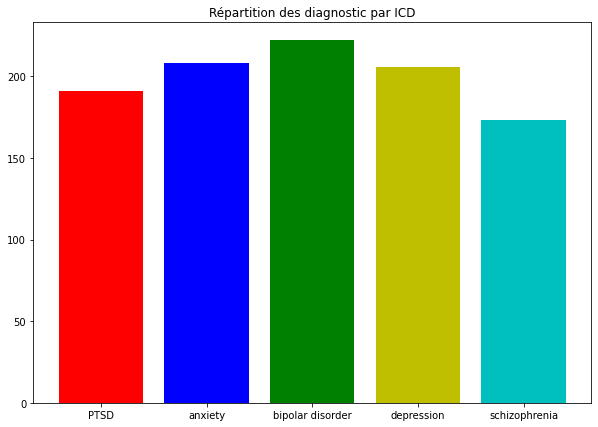

In [210]:
diagnostic=data.groupby('diagnosis')['icd_code'].count().reset_index()
plt.figure(figsize=(10,7))
plt.bar(height=diagnostic['icd_code'],x=diagnostic['diagnosis'],color=['r','b','g','y','c'])
plt.title('Répartition des diagnostic par ICD')
plt.show()

In [211]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r',',' ',text) 
    return text

In [212]:
#Supprimer les stopword( mots vides de sens)
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

In [213]:
#Lemmatization
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [214]:
def finalprepocess(string):
    return lemmatizer(stopword(preprocess(string)))
data['clean_text']=data['icd_desc_long'].apply(lambda x:finalprepocess(x))
data.head()

,diagnosis,icd_code,icd_desc_long,clean_text
0,depression,S85011,"Laceration of popliteal artery, right leg",laceration popliteal artery right leg
1,bipolar disorder,S6401XS,Injury of ulnar nerve at wrist and hand level ...,injury ulnar nerve wrist hand level right arm ...
2,PTSD,F1195,"Opioid use, unspecified with opioid-induced ps...",opioid use unspecified opioid-induced psychoti...
3,schizophrenia,T463X6S,"Underdosing of coronary vasodilators, sequela",underdosing coronary vasodilator sequela
4,bipolar disorder,T23129D,Burn of first degree of unspecified single fin...,burn first degree unspecified single finger ( ...


Diagnostic depression


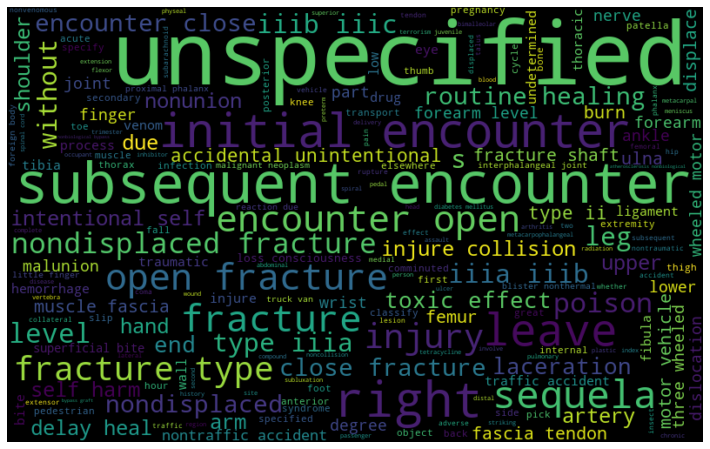

Diagnostic bipolar disorder


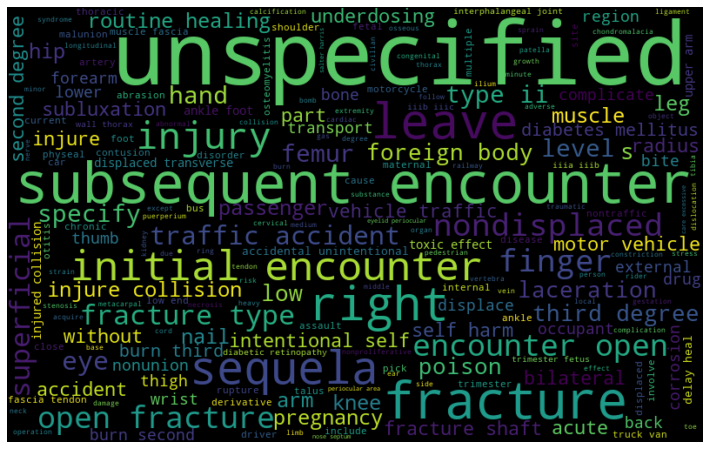

Diagnostic PTSD


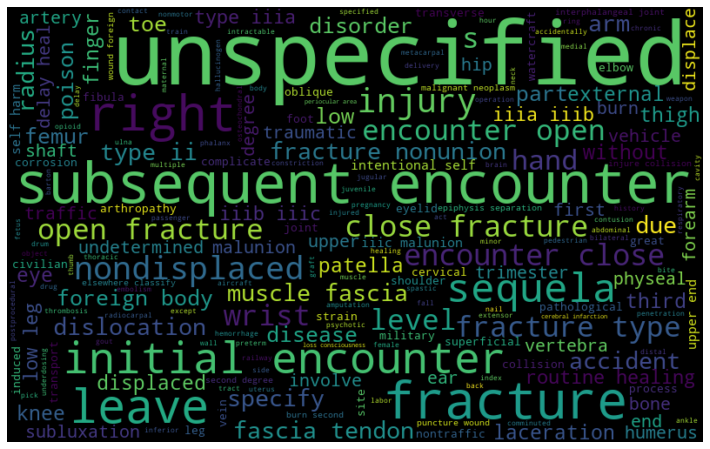

Diagnostic schizophrenia


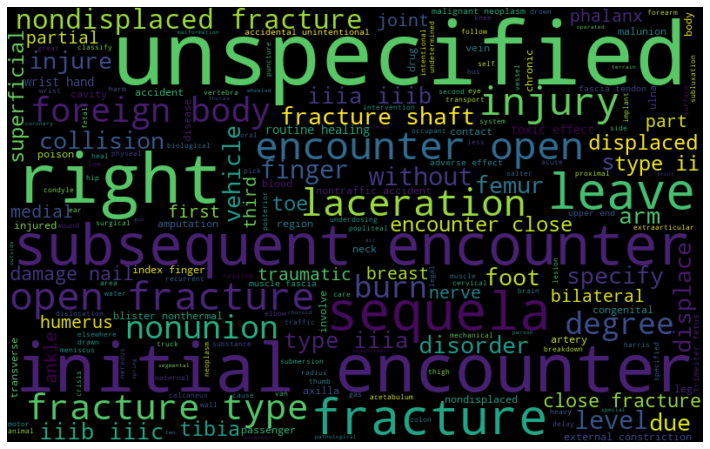

Diagnostic anxiety


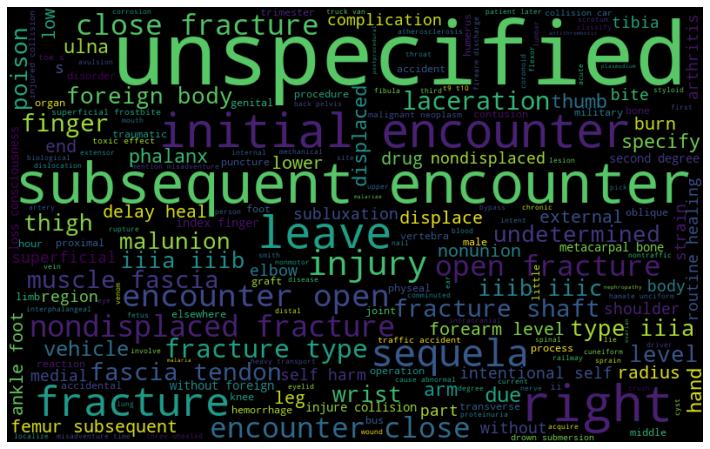

In [215]:
# Visualizing all words
for i in data['diagnosis'].unique():
        print('Diagnostic',i)
        try:
         all_words = " ".join(sent for sent in data['clean_text'][data['diagnosis']==i])
         wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
         plt.figure(figsize=(15,8))
         plt.imshow(wordcloud, interpolation='bilinear')
         plt.axis('off')
         plt.show()
        except ValueError:
          print("Pas de mots")

0:depression
1:bipolar disorder
2:PTSD
3:schizophrenia
4:anxiety

In [216]:
le=LabelEncoder()
data['diagnosis']=le.fit_transform(data['diagnosis'])
data.head()

,diagnosis,icd_code,icd_desc_long,clean_text
0,3,S85011,"Laceration of popliteal artery, right leg",laceration popliteal artery right leg
1,2,S6401XS,Injury of ulnar nerve at wrist and hand level ...,injury ulnar nerve wrist hand level right arm ...
2,0,F1195,"Opioid use, unspecified with opioid-induced ps...",opioid use unspecified opioid-induced psychoti...
3,4,T463X6S,"Underdosing of coronary vasodilators, sequela",underdosing coronary vasodilator sequela
4,2,T23129D,Burn of first degree of unspecified single fin...,burn first degree unspecified single finger ( ...


In [217]:
x_train,x_test,y_train,y_test=train_test_split(data['clean_text'],data['diagnosis'],test_size=0.3,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(700,) (700,)
(300,) (300,)


Vectorisation using countvectorizer

In [218]:
#Create Document Term Matrix
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

Modèle de ML

In [219]:
from sklearn.ensemble import GradientBoostingClassifier

# Créez un modèle Gradient Boosting Classifier
model_gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entraînez le modèle sur les données d'entraînement
model_gbm.fit(x_train, y_train)

#voir la performance du modele: precision
print('Precision train: {:.2f}'.format(model_gbm.score(x_train, y_train)))
print('Precision test : {:.2f}'.format(model_gbm.score(x_test, y_test)))
print('\n')

Precision train: 0.78
Precision test : 0.22




In [220]:
#Créer un modèle de forêt aléatoire
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)
#voir la performance du modele: precision
print('Precision train: {:.2f}'.format(model_rf.score(x_train, y_train)))
print('Precision test : {:.2f}'.format(model_rf.score(x_test, y_test)))
print('\n')

Precision train: 1.00
Precision test : 0.19




In [221]:
#Créer un modèle de decision tree
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
#voir la performance du modele: precision
print('Precision train: {:.2f}'.format(model_dt.score(x_train, y_train)))
print('Precision test : {:.2f}'.format(model_dt.score(x_test, y_test)))
print('\n')

Precision train: 1.00
Precision test : 0.19




Choix du modèle et evaluation du modèle

In [222]:
#Faire une prediction avec le modele
prediction = model_rf.predict(x_test)
#voir les resultats du modele:
y_verif= pd.DataFrame({'Expected':y_test, 'Predicted':prediction})
y_verif.head(15)

,Expected,Predicted
521,3,2
737,0,1
740,3,0
660,1,4
411,1,0
678,0,0
626,3,0
513,3,1
859,1,4
136,4,4


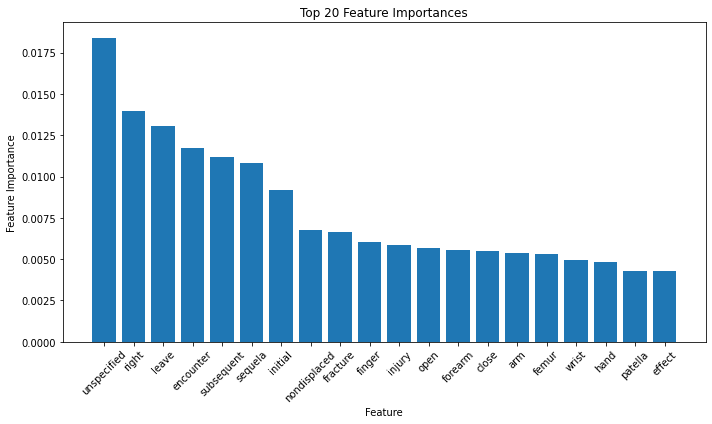

In [223]:
#Feature Importance of random forest
feature_importances = model_rf.feature_importances_
# Get feature names
feature_names = vectorizer.get_feature_names_out()
indices = np.argsort(feature_importances)[::-1]
# Get feature names (assuming X is a pandas DataFrame or a NumPy array with feature names)

# Plot the top 20 features in descending order
top_features_count = 20
plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importances")
plt.bar(range(top_features_count), feature_importances[indices[:top_features_count]], align="center")
plt.xticks(range(top_features_count), [feature_names[i] for i in indices[:top_features_count]], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.tight_layout()
plt.show()

In [224]:
print(classification_report(y_test, model_rf.predict(x_test), target_names=["0","1","2","3","4"]))   

              precision    recall  f1-score   support

           0       0.16      0.21      0.18        58
           1       0.20      0.14      0.17        71
           2       0.23      0.38      0.28        65
           3       0.19      0.13      0.16        60
           4       0.14      0.07      0.09        46

    accuracy                           0.19       300
   macro avg       0.18      0.19      0.17       300
weighted avg       0.19      0.19      0.18       300



c:\Users\lecka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


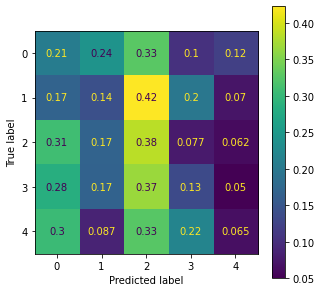

In [225]:
#permet de visualiser les metriques: fp,fn,tp,tn, seuil

from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 5
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_rf,x_test,y_test,normalize='true')

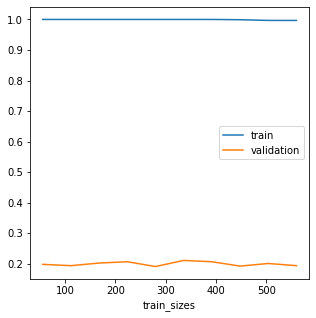

In [226]:
from sklearn.model_selection import learning_curve


N, train_score, val_score = learning_curve(model_rf, x_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
#D apres les deux courbes, il nous faudrait plus de données pour ameliorer la precision du modele